# 1-Linear Regression Model
Implementation of a single variable  linear regression model both from scratch and using built in functions. This example uses the scores dataset to compare the number of hours studied to the scores received as a result.

First, we need to setup the dependencies and import the dataset.

In [2]:
#import the libraries and classes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#import data
df = pd.read_csv('score.csv', sep=',')
x = df.loc[:,"Hours"]
y = df.loc[:,"Scores"]

Examine the generated figure below to see the relationship of the given inputs.

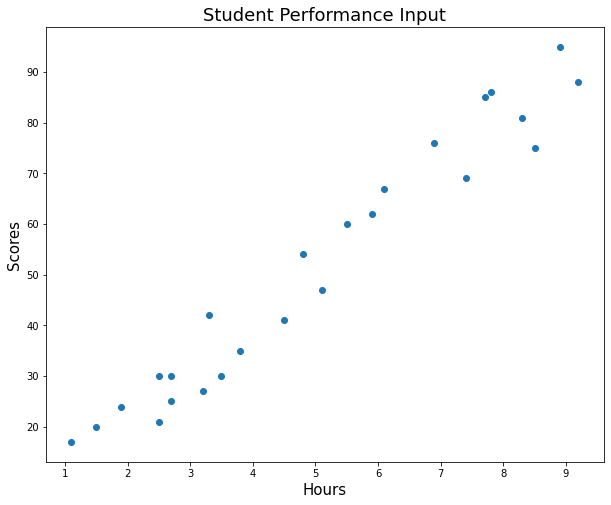

In [3]:
#Plotting of the input values
plt.figure(figsize = (10,8))
plt.scatter(x, y )
plt.xlabel("Hours", fontsize = 15)
plt.ylabel("Scores", fontsize = 15)
plt.title("Student Performance Input", fontsize = 18)
plt.show()

## Linear Regression From Scratch

Let's build the linear regression model first from scratch using only the slope and y-intercept

In [4]:
#building the linear regression using only the slope and y-intercept
def lin_reg(x,y):
  x_mean = x.mean() #calculate the means of both x & y
  y_mean = y.mean()

  m_numerator = ((x - x_mean) * (y - y_mean)).sum() #calculate the slope, such as rise / run
  m_denominator = ((x - x_mean)**2).sum()
  m = m_numerator / m_denominator

  intercept = y_mean - (m*x_mean) #modeled after y = mx +b; b = y - mx

  reg_line = intercept + m*x
  return reg_line


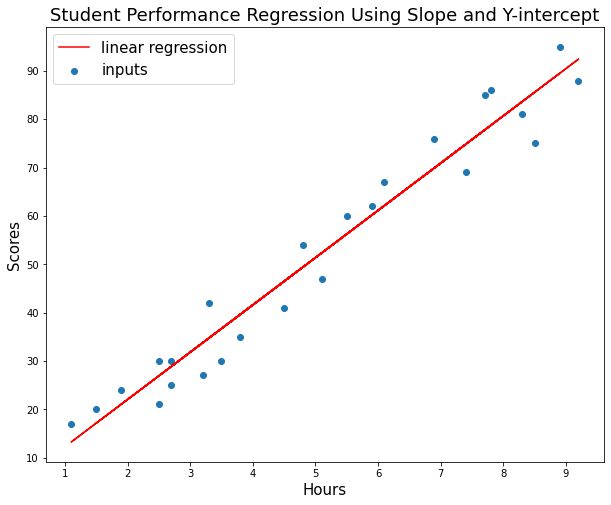

In [5]:
#plot the slope implementation
plt.figure(figsize = (10,8))
plt.scatter(x, y, label = "inputs")
plt.plot(x, lin_reg(x,y), color = "red", label = "linear regression")
plt.xlabel("Hours", fontsize = 15)
plt.ylabel("Scores", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Student Performance Regression Using Slope and Y-intercept", fontsize = 18)
plt.show()

## Linear Regression Using Built-In Functions

In [6]:
#short example of using built in functions
x = np.array(x).reshape((-1,1))
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 20, random_state=0) #function to train the data
model = LinearRegression() #use the built in function from sklearn
model.fit(x_train,y_train)
y_pred = model.predict(x)

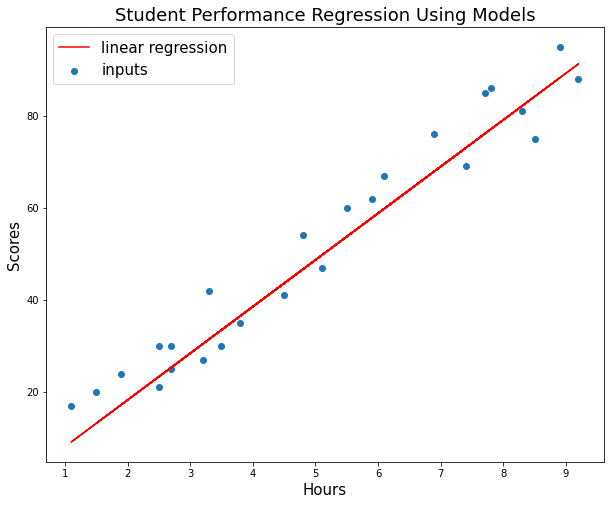

In [7]:
#plotting the LinearRegression Example
plt.figure(figsize = (10,8))
plt.scatter(x, y, label = "inputs")
plt.plot(x, y_pred, color = "red", label = "linear regression")
plt.xlabel("Hours", fontsize = 15)
plt.ylabel("Scores", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Student Performance Regression Using Models", fontsize = 18)
plt.show()

The outputs of these two methods look quite similar, but when training the data in practice, the values of alpha (weights) fluctuate when minimizing the cost function. To demonstrate this, we use Stochastic Gradient Descent Algorithm to optimize the weights and biases. 

## Linear Regression from Training Models

In [8]:
#training implementation influenced by what was shown in the lectures
class SingleNeuron(object):
    def __init__(self, activation_function): #preactivation function
        self.activation_function = activation_function

    def train(self, x, y, alpha = 0.005, epochs = 50): #calculates the gradient descent for each epoch
        self.w_ = np.random.rand(1 + x.shape[1]) #the weights and biases of the nueron (the last entry is the bias)
        self.errors_ = [] #list of the MSE
        N = x.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(x, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, x): #uses the given values to make a prediction
        preactivation = np.dot(x, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


def linear_activation(z):
    return z

In [9]:
#x = x.values
x = x.reshape(-1, 1)
#y = y.values

#activate the class by sending the node
node = SingleNeuron(linear_activation)

#train the model with specified values of alpha and epochs/iterations
node.train(x, y, alpha = 0.0001, epochs = 50)

domain = np.linspace(np.min(x) - .5, np.max(x) + .5, 100)

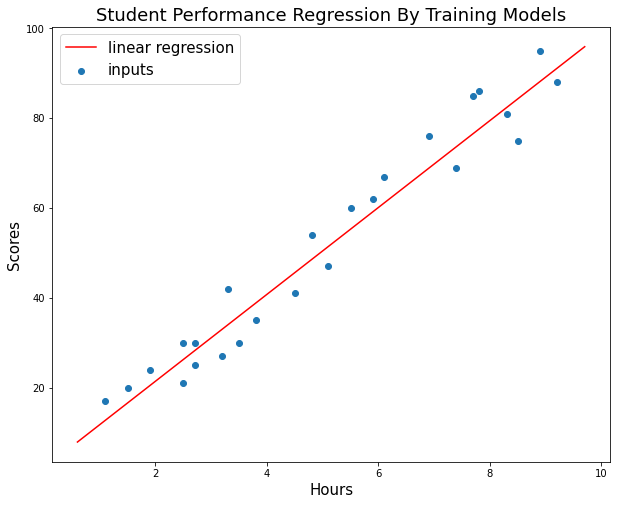

In [10]:
#plotting the from scratch training method
plt.figure(figsize = (10,8))
plt.scatter(x, y, label = "inputs")
plt.plot(domain, node.predict(domain.reshape(-1,1)), color = "red", label = "linear regression")
plt.xlabel("Hours", fontsize = 15)
plt.ylabel("Scores", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Student Performance Regression By Training Models", fontsize = 18)
plt.show()

### Understanding the Errors of each Epoch

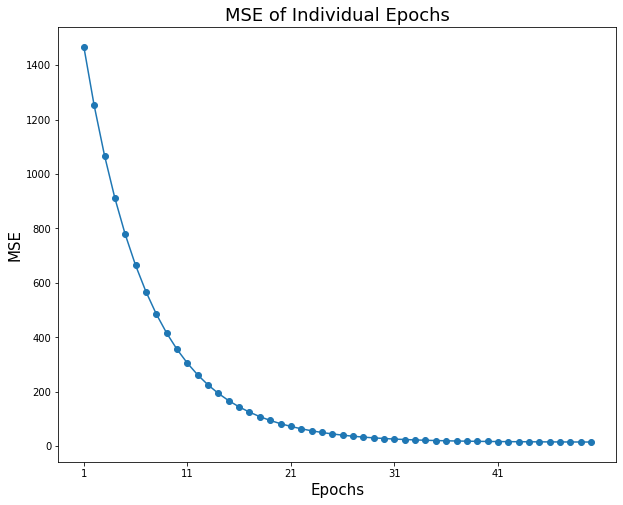

In [11]:
#visualize how many errors were generated after each epoch
plt.figure(figsize = (10,8))
plt.plot(range(1, len(node.errors_) + 1), node.errors_, marker= "o")
plt.xlabel("Epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1, 10))
plt.title("MSE of Individual Epochs", fontsize = 18)
plt.show()

As the number of epochs increases, the error approaches 0 because the training model is adapting and accurately predicting the regression. Manipulating the values of alpha can return steeper or more gradual learning rates. 

For example, a smaller alpha approaches 0 more slowly than larger values of alpha as demonstrated below:

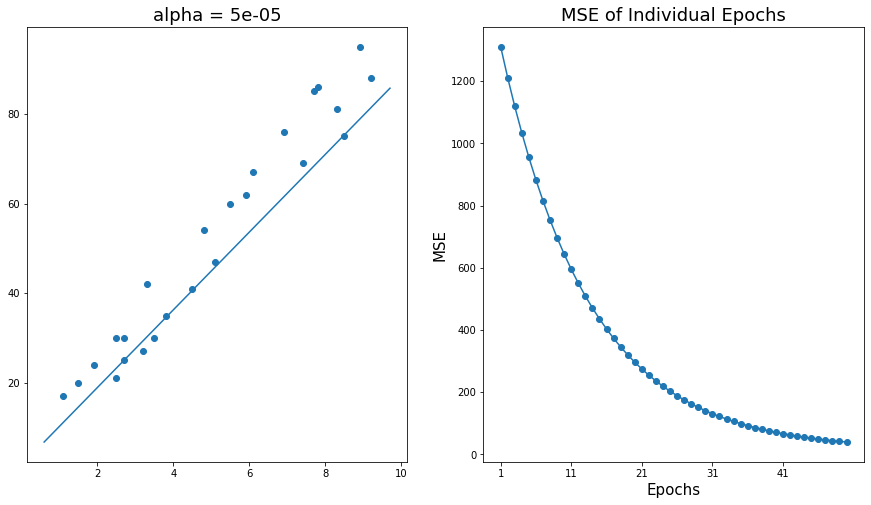

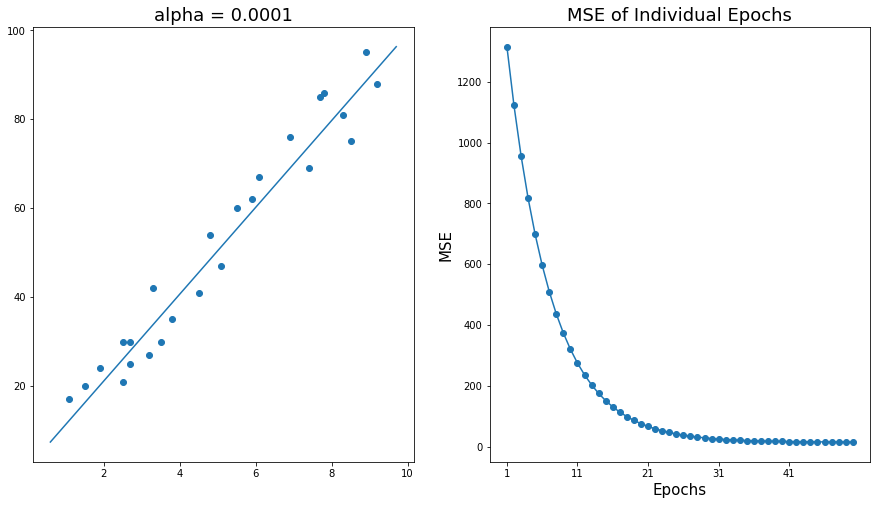

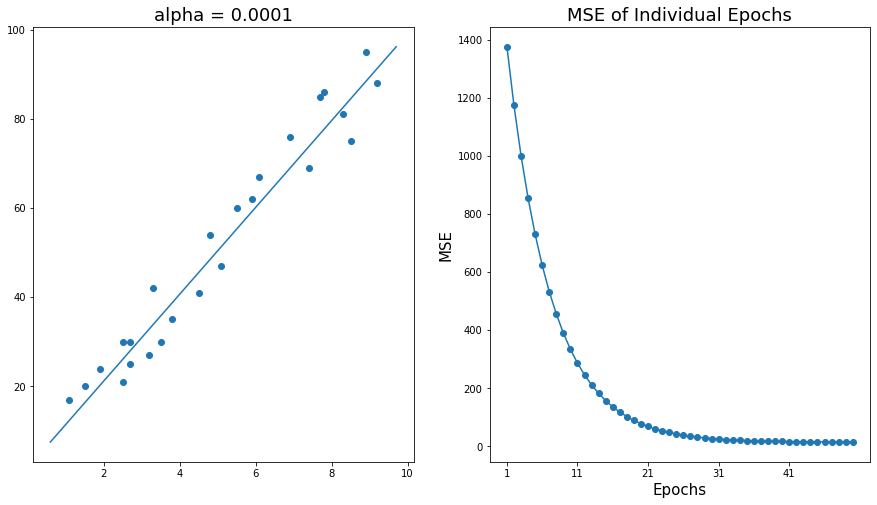

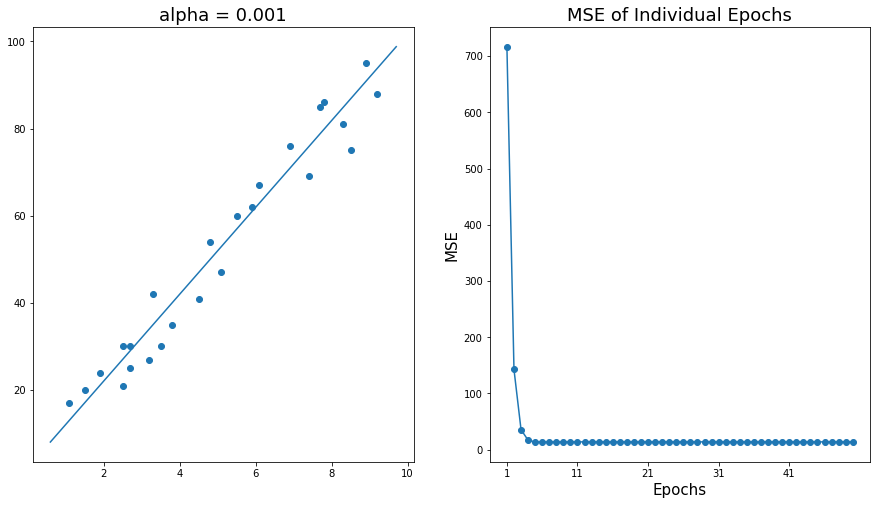

In [12]:
alphas = [0.00005, 0.0001, 0.0001, 0.001]

for alpha in alphas:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

  node = SingleNeuron(linear_activation)
  node.train(x, y, alpha = alpha, epochs = 50)

  ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
  ax1.scatter(x, y)
  ax1.set_title(f"alpha = {alpha}", fontsize = 18)
      
  ax2.plot(range(1, len(node.errors_) + 1), node.errors_, marker= "o")
  ax2.set_xlabel("Epochs", fontsize = 15)
  ax2.set_ylabel("MSE", fontsize = 15)
  ax2.set_xticks(range(1, len(node.errors_) + 1, 10))
  ax2.set_title("MSE of Individual Epochs", fontsize = 18)

As alpha changes, the regressive line moves slightly between the range of points, but we can see that the accuracy for reduced errors in the trained model is optimized as values of alpha get larger.